In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


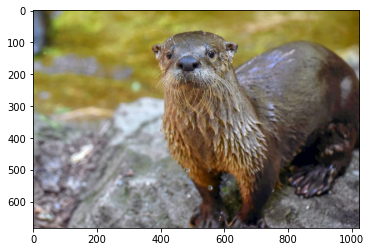

In [4]:
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from google.colab import files

%matplotlib inline
K.clear_session()

blnUploadImage = False

model = VGG16(weights='imagenet')

#Load Sample Image from Google Drive
if blnUploadImage == False:
  path = '/content/drive/My Drive/Otter.jpg'
  img=mpimg.imread(path)
  plt.imshow(img)

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from keras.preprocessing import image
#Resize Image
img = image.load_img(path, target_size=(224, 224))

#Convert Image to Numpy Array
x = image.img_to_array(img)

#Place image into outer-array layer (Rquired by model)
import numpy as np
x = np.expand_dims(x, axis=0)
x.shape

#Pre-process
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)

Using TensorFlow backend.


In [7]:
import pandas as pd
from keras.applications.vgg16 import decode_predictions
preds = model.predict(x)

#Prediction format (found from VGG16 )
predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
print('predicted class:',predictions.loc[0,'category'])

40960/35363 [==================================] - 0s 0us/step
predicted class: otter
